In [152]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from array import array

In [153]:
# Dataset
#df = pd.read_csv('hombres.csv')
df = pd.read_csv('mujeres.csv')

#### Por hacer
- ✅ Crear una funcion para obtener la media de datos agrupados
- ✅ Crear una funcion para obtener la moda de datos agrupados
- ✅ Crear una funcion para obtener la mediana de datos agrupados
- ✅ Crear una funcion para obtener la varianza de datos agrupados
- ✅ Crear una funcion para obtener el rango de datos agrupados
- ✅ Crear diagrama de tallos y hojas (¿hacer en excel?)
- ✅ Crear diagrama de puntos 
- ✅ Crear tabla de datos agrupados 
- Comparar ambas tablas
- Crear script
- Documento PDF

#### Variables globales

In [154]:
# Rango y numero de elementos
rango = df.max() - df.min()
n = df.shape[0]

nombre_columna = df.columns[0]

# Numero de clases
if n < 30:
    numero_clases = int(np.ceil(np.sqrt(n)))
else:
    numero_clases = int(np.ceil(1 + (3.322 * np.log10(n))))

# Amplitud
amplitud = rango / numero_clases

#### Funciones por hacer

In [155]:
# Funcion para obtener la media
def media_agrupada(tabla_frecuencias, n):
    tabla_frecuencias['x_i * f_i'] = tabla_frecuencias['Marca de clase'] * tabla_frecuencias['Frecuencia absoluta']
    sum_xifi = float(tabla_frecuencias['x_i * f_i'].sum())
    media_agrupada = sum_xifi / n
    return media_agrupada

In [156]:
# Funcion para obtener la clase a la que pertenece la moda
def moda_clase(tabla_frecuencias):
    clase = 0
    frecuencia_mayor = tabla_frecuencias['Frecuencia absoluta'].max()

    for i in tabla_frecuencias['Frecuencia absoluta']:
            clase += 1
            if i == frecuencia_mayor:
                return clase

# Funcion para obtener la moda
def moda_agrupada(moda_clase, amplitud, tabla_frecuencias, intervalos_float):
    limite_inferior = min(intervalos_float[moda_clase - 1]) 
    delta_1 = tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase - 1] - tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase - 2]
    delta_2 = tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase - 1] - tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase]
    moda_agrupada = limite_inferior + ((delta_1) / (delta_1 + delta_2)) * amplitud
    return moda_agrupada

In [157]:
# Funcion para la posicion de la clase en la que se encuentra la mediana
def mediana_clase(n, tabla_frecuencias):
    posicion = (n + 1) / 2
    clase = 0

    posicion_clase = next((clase + 1 for clase, frecuencia_acumulada in enumerate(tabla_frecuencias['Frecuencia acumulada']) if frecuencia_acumulada>=posicion), None)
    
    return posicion_clase

# Funcion para obtener la mediana
def mediana_agrupada(mediana_clase, amplitud, tabla_frecuencias, intervalos_float):
    limite_inferior = min(intervalos_float[mediana_clase - 1]) 
    frec_acum_anterior = tabla_frecuencias['Frecuencia acumulada'].iloc[mediana_clase - 2]
    frec_absoluta = tabla_frecuencias['Frecuencia absoluta'].iloc[mediana_clase -1]
    mediana_agrupada = limite_inferior + (((n / 2) - frec_acum_anterior) / frec_absoluta ) * amplitud

    return mediana_agrupada

In [158]:
# Funcion para obtener la varianza
def varianza_agrupada(tabla_frecuencias, n, media_agrupada):
    tabla_frecuencias['(x_i - \mu)^2'] = ((tabla_frecuencias['Marca de clase'] - media_agrupada) ** 2)
    tabla_frecuencias['(x_i - \mu)^2 * f_i'] = tabla_frecuencias['(x_i - \mu)^2'] * tabla_frecuencias['Frecuencia absoluta']
    sumatoria = tabla_frecuencias['(x_i - \mu)^2 * f_i'].sum()
    varianza_agrupada = (sumatoria) / (n - 1)
    return varianza_agrupada

In [159]:
# Funcion para obtener el rango
def rango_agrupado(tabla_frecuencias):
    rango = tabla_frecuencias['Marca de clase'].max() - tabla_frecuencias['Marca de clase'].min()
    return rango

#### Grafica de tallo y hoja

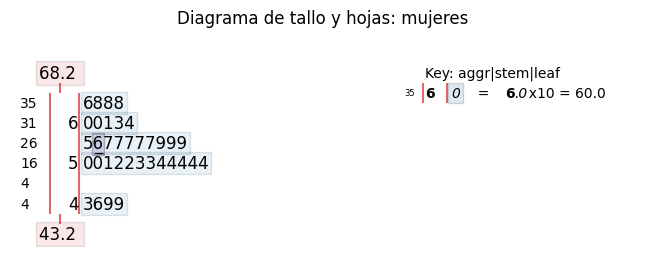

In [160]:
# Genera la grafica de tallo y hoja
# Arreglo con los valores
test_array = df[nombre_columna].to_numpy()
fig, test_array = sg.stem_graphic(test_array)
plt.title("Diagrama de tallo y hojas: " + df.columns[0].lower())
plt.savefig('diagrama_tallo_' + df.columns[0].lower() + '.png')

#### Diagrama de puntos

In [161]:
# Funcion para generar el diagrama de puntos
def dotplot(input_x, **args):

    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts = True)
    
    # Convert 1D input into 2D array
    scatter_x = [] # x values 
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)

    # draw dot plot using scatter() 
    plt.scatter(scatter_x, scatter_y, s = 10, c = "#000000", **args)
    
    # Optional - show all unique values on x-axis. 
    # Matplotlib might hide some of them  
    # plt.gca().set_xticks(unique_values)

    plt.autoscale(enable=True, axis='x', tight=False)

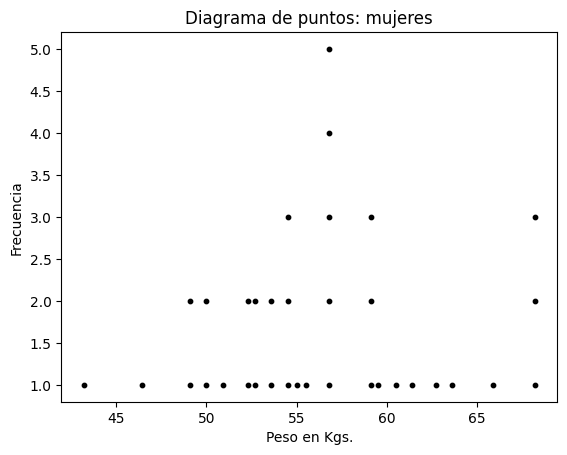

In [162]:
# Genera diagrama
test_array = df[nombre_columna].to_numpy()
dotplot(input_x = test_array)
plt.title("Diagrama de puntos: " + df.columns[0].lower())
plt.xlabel("Peso en Kgs.")
plt.ylabel("Frecuencia")
plt.savefig('diagrama_puntos_' + df.columns[0].lower() + '.png')

#### Tabla de datos agrupados

In [163]:
# Por terminar, marca de clase, f_i * x_i, ..., optimizar codigo
nombre_columna = df.columns[0]
clases = df[nombre_columna].value_counts(bins = numero_clases, sort = False)
tabla_frecuencias = pd.DataFrame(clases)
tabla_frecuencias.rename(columns = {'count':'Frecuencia absoluta'}, inplace = True)
frecuencia_acumulada = []
acumulador = 0

# Columna: frecuencia acumulada
for i in tabla_frecuencias.index:
    acumulador = acumulador + tabla_frecuencias['Frecuencia absoluta'][i]
    frecuencia_acumulada.append(acumulador)

# Columnas: f. acumulada y f. relativa
tabla_frecuencias['Frecuencia acumulada'] = frecuencia_acumulada
tabla_frecuencias['Frecuencia relativa absoluta'] = tabla_frecuencias['Frecuencia absoluta'] / n

# Arreglo de intervalos
# "[0-9]+.[0-9]+, [0-9]+.[0-9]+"gm
intervalos_str = []
intervalos_float = []
marca_clase = []

clases_lista = clases.index

for i in clases_lista:
    matched = re.search("[0-9]+.[0-9]+, [0-9]+.[0-9]+", str(i))
    intervalos_str.append(matched.group())
    
for i in intervalos_str:
    intervalos_float.append(i.split(', '))

for i in intervalos_float:
    for j in i:
        j = float(j)

intervalos_float = np.array(intervalos_float, dtype = float)

for i in intervalos_float:
    marca_clase.append(np.sum(i) / 2)

# Columna: frecuencia acumulada relativa
tabla_frecuencias['Frecuencia relativa acumulada'] = tabla_frecuencias['Frecuencia acumulada'] / n

# Columna: marca de clase
tabla_frecuencias['Marca de clase'] = marca_clase

# Columna: porcentaje
tabla_frecuencias['Porcentaje'] = tabla_frecuencias['Frecuencia relativa absoluta'] * 100

tabla_frecuencias

,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa absoluta,Frecuencia relativa acumulada,Marca de clase,Porcentaje
MUJERES,,,,,,
"(43.174, 46.771]",2,2,0.057143,0.057143,44.9725,5.714286
"(46.771, 50.343]",4,6,0.114286,0.171429,48.5570,11.428571
"(50.343, 53.914]",7,13,0.200000,0.371429,52.1285,20.000000
"(53.914, 57.486]",10,23,0.285714,0.657143,55.7000,28.571429
"(57.486, 61.057]",5,28,0.142857,0.800000,59.2715,14.285714
"(61.057, 64.629]",3,31,0.085714,0.885714,62.8430,8.571429
"(64.629, 68.2]",4,35,0.114286,1.000000,66.4145,11.428571


In [164]:
tabla_frecuencias.to_csv('tabla_frecuencias_' + df.columns[0] + '.csv')

#### Funciones test

In [165]:
rango_agrupado = rango_agrupado(tabla_frecuencias)
moda_clase = moda_clase(tabla_frecuencias)
moda_agrupada = moda_agrupada(moda_clase, amplitud, tabla_frecuencias, intervalos_float)
mediana_clase = mediana_clase(n, tabla_frecuencias)
mediana_agrupada = mediana_agrupada(mediana_clase, amplitud, tabla_frecuencias, intervalos_float)
media_agrupada = media_agrupada(tabla_frecuencias, n)
varianza_agrupada = varianza_agrupada(tabla_frecuencias, n, media_agrupada)
medidas_arreglo = [media_agrupada, float(mediana_agrupada), float(moda_agrupada), varianza_agrupada, rango_agrupado, float(df.max() - df.min())]
#python_arreglo = [df.columns[0].mean(), df.columns[0].median(), df.columns[0].mode().iloc[0], df.columns[0].var(ddof = 1), 0]

medidas_funciones = pd.DataFrame(medidas_arreglo, columns = ['Medidas de tendencia central: ' + df.columns[0].lower()], index = ['Media', 'Mediana', 'Moda', 'Varianza', 'Rango', 'Rango real'])
#medidas_python = pd.DataFrame(python_arreglo, columns = ['Valor real'])

medidas_funciones

/tmp/ipykernel_1129/349951850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  medidas_arreglo = [media_agrupada, float(mediana_agrupada), float(moda_agrupada), varianza_agrupada, rango_agrupado, float(df.max() - df.min())]


,Medidas de tendencia central: mujeres
Media,55.903343
Mediana,55.521143
Moda,55.253286
Varianza,35.239349
Rango,21.442000
Rango real,25.000000


In [166]:
medidas_funciones.to_csv('tabla_resultados_' + df.columns[0] + '.csv')

In [167]:
df.var(ddof = 1)

MUJERES    36.948689
dtype: float64

In [168]:
df.describe()

,MUJERES
count,35.000000
mean,56.268571
std,6.078543
min,43.200000
25%,52.500000
50%,55.500000
75%,59.300000
max,68.200000
